In [1]:
import os
import numpy as np 
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
import seaborn as sns
import plotly.express as px
import nltk
import helpers.data_mining_helpers as dmh
import time

%matplotlib inline

In [61]:
# plz setting your own relative data_path for trainning set
# plz import the necessary file by your own
# or just comment out the part you don't need to import
dir_data = 'data_set'

f_train = os.path.join(dir_data, 'task1_trainset.csv')
f_abstract_task = os.path.join(dir_data, 'abstract_task.csv')
f_test = os.path.join(dir_data, 'task1_public_testset.csv')
# f_test_split = os.path.join(dir_data, 'test_split.csv')

# read file and convert into pandas dataframe
train_data = pd.read_csv(f_train)
abstract_task = pd.read_csv(f_abstract_task)
test_data = pd.read_csv(f_test)
# test_split = pd.read_csv(f_test_split)

tasks = ['BACKGROUND', 'OBJECTIVES', 'METHODS', 'RESULTS', 'CONCLUSIONS', 'OTHERS']
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown']

In [3]:
train_data['Abstract_Split'] = train_data['Abstract'].apply(lambda a : a.split('$$$'))
test_data['Abstract_Split'] = test_data['Abstract'].apply(lambda a : a.split('$$$'))

In [4]:
train_data['Task_Split'] = train_data['Task 1'].apply(lambda t : t.split(' '))

In [5]:
train_data['Num_of_sentences'] = train_data['Abstract_Split'].apply(lambda a : len(a))
test_data['Num_of_sentences'] = test_data['Abstract_Split'].apply(lambda a : len(a))

In [6]:
train_data.head()

,Id,Title,Abstract,Authors,Categories,Created Date,Task 1,Abstract_Split,Task_Split,Num_of_sentences
0,D00001,A Brain-Inspired Trust Management Model to Ass...,Rapid popularity of Internet of Things (IoT) a...,Mahmud/Kaiser/Rahman/Rahman/Shabut/Al-Mamun/Hu...,cs.CR/cs.AI/q-bio.NC,2018-01-11,BACKGROUND OBJECTIVES METHODS METHODS RESULTS ...,[Rapid popularity of Internet of Things (IoT) ...,"[BACKGROUND, OBJECTIVES, METHODS, METHODS, RES...",6
1,D00002,On Efficient Computation of Shortest Dubins Pa...,"In this paper, we address the problem of compu...",Sadeghi/Smith,cs.SY/cs.RO/math.OC,2016-09-21,OBJECTIVES OTHERS METHODS/RESULTS RESULTS RESULTS,"[In this paper, we address the problem of comp...","[OBJECTIVES, OTHERS, METHODS/RESULTS, RESULTS,...",5
2,D00003,Data-driven Upsampling of Point Clouds,High quality upsampling of sparse 3D point clo...,Zhang/Jiang/Yang/Yamakawa/Shimada/Kara,cs.CV,2018-07-07,BACKGROUND OBJECTIVES METHODS METHODS METHODS ...,[High quality upsampling of sparse 3D point cl...,"[BACKGROUND, OBJECTIVES, METHODS, METHODS, MET...",8
3,D00004,Accessibility or Usability of InteractSE? A He...,Internet is the main source of information now...,Aqle/Khowaja/Al-Thani,cs.HC,2018-08-29,BACKGROUND BACKGROUND BACKGROUND OBJECTIVES OB...,[Internet is the main source of information no...,"[BACKGROUND, BACKGROUND, BACKGROUND, OBJECTIVE...",16
4,D00005,Spatio-Temporal Facial Expression Recognition ...,Automated Facial Expression Recognition (FER) ...,Hasani/Mahoor,cs.CV,2017-03-20,BACKGROUND BACKGROUND BACKGROUND BACKGROUND ME...,[Automated Facial Expression Recognition (FER)...,"[BACKGROUND, BACKGROUND, BACKGROUND, BACKGROUN...",11


In [7]:
test_data.head()

,Id,Title,Abstract,Authors,Categories,Created Date,Abstract_Split,Num_of_sentences
0,T00001,Cheating-Resilient Incentive Scheme for Mobile...,Mobile Crowdsensing is a promising paradigm fo...,Zhao/Yang/Yu/Yao/Lin/Li,cs.NI/cs.CR,2017-01-08,[Mobile Crowdsensing is a promising paradigm f...,7
1,T00002,10 Inventions on Key Guides and Keyboard Templ...,A keyboard has many function keys and each fun...,Mishra,cs.HC,2013-10-11,[A keyboard has many function keys and each fu...,5
2,T00003,Approximating Flexibility in Distributed Energ...,With increasing availability of communication ...,Kundu/Kalsi/Backhaus,cs.SY/math.OC,2018-03-14,[With increasing availability of communication...,5
3,T00004,A New Perspective on Clustered Planarity as a ...,The clustered planarity problem (c-planarity) ...,Bläsius/Rutter,cs.DS/cs.DM/math.CO,2015-06-18,[The clustered planarity problem (c-planarity)...,7
4,T00005,Multitask Evolution with Cartesian Genetic Pro...,We introduce a genetic programming method for ...,Scott/De Jong,cs.NE,2017-02-07,[We introduce a genetic programming method for...,2


In [62]:
abstract_task.head()

,Sentence,Task,label,unigrams,processed_sen,unigrams_no_stop_words,processed_sen_no_stop,Doc_no.,Num_of_sentences,Rank,Rank%,Is_first,Is_last,BACKGROUND,OBJECTIVES,METHODS,RESULTS,CONCLUSIONS,OTHERS
0,Rapid popularity of Internet of Things (IoT) a...,BACKGROUND,['BACKGROUND'],"['rapid', 'popular', 'of', 'internet', 'of', '...",rapid popular of internet of thing ( iot ) and...,"['rapid', 'popular', 'internet', 'thing', '(',...",rapid popular internet thing ( iot ) cloud com...,1,6,1,0.166667,1,0,1,0,0,0,0,0
1,To ensure secure and reliable data communicati...,OBJECTIVES,['OBJECTIVES'],"['to', 'ensur', 'secur', 'and', 'reliabl', 'da...",to ensur secur and reliabl data commun between...,"['ensur', 'secur', 'reliabl', 'data', 'commun'...",ensur secur reliabl data commun end-to-end ( e...,1,6,2,0.333333,0,0,0,1,0,0,0,0
2,This paper introduces a Neuro-Fuzzy based Brai...,METHODS,['METHODS'],"['thi', 'paper', 'introduc', 'a', 'neuro-fuzzi...",thi paper introduc a neuro-fuzzi base brain-in...,"['paper', 'introduc', 'neuro-fuzzi', 'base', '...",paper introduc neuro-fuzzi base brain-inspir t...,1,6,3,0.500000,0,0,0,0,1,0,0,0
3,The proposed TMM utilizes node behavioral trus...,METHODS,['METHODS'],"['the', 'propos', 'tmm', 'util', 'node', 'beha...",the propos tmm util node behavior trust and da...,"['propos', 'tmm', 'util', 'node', 'behavior', ...",propos tmm util node behavior trust data trust...,1,6,4,0.666667,0,0,0,0,1,0,0,0
4,"In contrast to the existing fuzzy based TMMs, ...",RESULTS,['RESULTS'],"['in', 'contrast', 'to', 'the', 'exist', 'fuzz...","in contrast to the exist fuzzi base tmm , the ...","['contrast', 'exist', 'fuzzi', 'base', 'tmm', ...","contrast exist fuzzi base tmm , ns2 simul resu...",1,6,5,0.833333,0,0,0,0,0,1,0,0


In [63]:
test_split.head()

,Sentence,unigrams,processed_sen,unigrams_no_stop_words,processed_sen_no_stop,Doc_no.,Num_of_sentences,Rank,Rank%,Is_first,Is_last
0,Mobile Crowdsensing is a promising paradigm fo...,"['mobil', 'crowdsens', 'is', 'a', 'promis', 'p...",mobil crowdsens is a promis paradigm for ubiqu...,"['mobil', 'crowdsens', 'promis', 'paradigm', '...","mobil crowdsens promis paradigm ubiquit sens ,...",0,7,0,0.000000,1,0
1,As a fundamental property of Mobile Crowdsensi...,"['as', 'a', 'fundament', 'properti', 'of', 'mo...",as a fundament properti of mobil crowdsens sys...,"['fundament', 'properti', 'mobil', 'crowdsens'...","fundament properti mobil crowdsens system , te...",0,7,1,0.142857,0,0
2,"Therefore, a mechanism is required for the sys...","['therefor', ',', 'a', 'mechan', 'is', 'requir...","therefor , a mechan is requir for the system s...","['therefor', ',', 'mechan', 'requir', 'system'...","therefor , mechan requir system server recruit...",0,7,2,0.285714,0,0
3,"In this paper, we develop a novel Cheating-Res...","['in', 'thi', 'paper', ',', 'we', 'develop', '...","in thi paper , we develop a novel cheating-res...","['paper', ',', 'develop', 'novel', 'cheating-r...","paper , develop novel cheating-resili incent (...",0,7,3,0.428571,0,0
4,"Via theoretical analysis, we demonstrate the c...","['via', 'theoret', 'analysi', ',', 'we', 'demo...","via theoret analysi , we demonstr the correct ...","['via', 'theoret', 'analysi', ',', 'demonstr',...","via theoret analysi , demonstr correct design .",0,7,4,0.571429,0,0


---

In [ ]:
df =train_data
train_sentence_task_dict = []

for doc_idx, row in df.iterrows():
    for sen_idx, (sen, cate) in enumerate(zip(row['Abstract_Split'], row['Task_Split'])):
        train_sentence_task_dict.append({
            'Sentence': sen,
            'Task': cate,
            'Doc_no.': doc_idx,
            'Rank': sen_idx,
            'Is_last': 1 if sen_idx == len(row['Abstract_Split']) - 1 else 0
        })

train_sentence_task_dict[:1]

In [9]:
df = test_data
test_sentence_task_dict = []

for doc_idx, row in df.iterrows():
    for sen_idx, sen in enumerate(row['Abstract_Split']):
        test_sentence_task_dict.append({
            'Sentence': sen,
            'Doc_no.': doc_idx,
            'Rank': sen_idx,
            'Is_last': 1 if sen_idx == len(row['Abstract_Split']) - 1 else 0
        })

test_sentence_task_dict[:1]

[{'Sentence': 'Mobile Crowdsensing is a promising paradigm for ubiquitous sensing, which explores the tremendous data collected by mobile smart devices with prominent spatial-temporal coverage.',
  'Doc_no.': 0,
  'Rank': 0,
  'Is_last': 0},
 {'Sentence': 'As a fundamental property of Mobile Crowdsensing Systems, temporally recruited mobile users can provide agile, fine-grained, and economical sensing labors, however their self-interest cannot guarantee the quality of the sensing data, even when there is a fair return.',
  'Doc_no.': 0,
  'Rank': 1,
  'Is_last': 0},
 {'Sentence': 'Therefore, a mechanism is required for the system server to recruit well-behaving users for credible sensing, and to stimulate and reward more contributive users based on sensing truth discovery to further increase credible reporting.',
  'Doc_no.': 0,
  'Rank': 2,
  'Is_last': 0}]

In [14]:
test_split = pd.DataFrame(test_sentence_task_dict)
test_split.head()
len(test_split)

131166

In [19]:
df = test_data
df_to_add = test_split
column_to_add = []

for doc_idx, row in df.iterrows():
    for i in range(row['Num_of_sentences']):
        column_to_add.append(row['Num_of_sentences'])

df_to_add['Num_of_sentences'] = column_to_add
len(column_to_add)

131166

In [20]:
df = test_data
df_to_add = test_split
column_to_add = []

for doc_idx, row in df.iterrows():
    for sen_idx, a in enumerate(row['Abstract_Split']):
        column_to_add.append(1 if sen_idx == 0 else 0)

df_to_add['Is_first'] = column_to_add
len(column_to_add)

131166

In [21]:
df = test_split
df['Rank%'] = df['Rank'] / df['Num_of_sentences']

In [48]:
df = test_split
df['processed_sen'] = df['Sentence'].apply(lambda s : s.lower())
# abstract_task['Sentence'].apply(lambda s : s.lower())

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

stemmer = PorterStemmer()
stop_words = set(stopwords.words('english')) 

unigrams = []
unigrams_no_stop_words = []

df = test_split

for i, row in df.iterrows():
    grams = word_tokenize(row['processed_sen'])
#     print(grams)
    grams_no = [w for w in grams if not w in stop_words]
#     print(grams_no)
    for j in range(len(grams)):
        grams[j] = stemmer.stem(grams[j])
    
#     print(grams)
    unigrams.append(grams)
    
    for j in range(len(grams_no)):
        grams_no[j] = stemmer.stem(grams_no[j])

#     print(grams_no)
    unigrams_no_stop_words.append(grams_no)

df['unigrams'] = unigrams
df['unigrams_no_stop_words'] = unigrams_no_stop_words
df['processed_sen'] = df['unigrams'].apply(lambda g : " ".join(g))
df['processed_sen_no_stop'] = df['unigrams_no_stop_words'].apply(lambda g : " ".join(g))

In [55]:
df = test_split
df['processed_sen'] = df['unigrams'].apply(lambda g : " ".join(g))
df['processed_sen_no_stop'] = df['unigrams_no_stop_words'].apply(lambda g : " ".join(g))

In [56]:
test_split.head()s

,Sentence,processed_sen,Doc_no.,Num_of_sentences,Rank,Rank%,Is_first,Is_last,unigrams,unigrams_no_stop_words,processed_sen_no_stop
0,Mobile Crowdsensing is a promising paradigm fo...,mobil crowdsens is a promis paradigm for ubiqu...,0,7,0,0.000000,1,0,"[mobil, crowdsens, is, a, promis, paradigm, fo...","[mobil, crowdsens, promis, paradigm, ubiquit, ...","mobil crowdsens promis paradigm ubiquit sens ,..."
1,As a fundamental property of Mobile Crowdsensi...,as a fundament properti of mobil crowdsens sys...,0,7,1,0.142857,0,0,"[as, a, fundament, properti, of, mobil, crowds...","[fundament, properti, mobil, crowdsens, system...","fundament properti mobil crowdsens system , te..."
2,"Therefore, a mechanism is required for the sys...","therefor , a mechan is requir for the system s...",0,7,2,0.285714,0,0,"[therefor, ,, a, mechan, is, requir, for, the,...","[therefor, ,, mechan, requir, system, server, ...","therefor , mechan requir system server recruit..."
3,"In this paper, we develop a novel Cheating-Res...","in thi paper , we develop a novel cheating-res...",0,7,3,0.428571,0,0,"[in, thi, paper, ,, we, develop, a, novel, che...","[paper, ,, develop, novel, cheating-resili, in...","paper , develop novel cheating-resili incent (..."
4,"Via theoretical analysis, we demonstrate the c...","via theoret analysi , we demonstr the correct ...",0,7,4,0.571429,0,0,"[via, theoret, analysi, ,, we, demonstr, the, ...","[via, theoret, analysi, ,, demonstr, correct, ...","via theoret analysi , demonstr correct design ."


In [41]:
# rearrange the columns of the dataframe
df = test_split
cols = df.columns.tolist()
cols

['Sentence',
 'Doc_no.',
 'Rank',
 'Is_last',
 'Num_of_sentences',
 'Is_first',
 'Rank%',
 'processed_sen']

In [58]:
test_split = df[cols]
test_split.head()

,Sentence,unigrams,processed_sen,unigrams_no_stop_words,processed_sen_no_stop,Doc_no.,Num_of_sentences,Rank,Rank%,Is_first,Is_last
0,Mobile Crowdsensing is a promising paradigm fo...,"[mobil, crowdsens, is, a, promis, paradigm, fo...",mobil crowdsens is a promis paradigm for ubiqu...,"[mobil, crowdsens, promis, paradigm, ubiquit, ...","mobil crowdsens promis paradigm ubiquit sens ,...",0,7,0,0.000000,1,0
1,As a fundamental property of Mobile Crowdsensi...,"[as, a, fundament, properti, of, mobil, crowds...",as a fundament properti of mobil crowdsens sys...,"[fundament, properti, mobil, crowdsens, system...","fundament properti mobil crowdsens system , te...",0,7,1,0.142857,0,0
2,"Therefore, a mechanism is required for the sys...","[therefor, ,, a, mechan, is, requir, for, the,...","therefor , a mechan is requir for the system s...","[therefor, ,, mechan, requir, system, server, ...","therefor , mechan requir system server recruit...",0,7,2,0.285714,0,0
3,"In this paper, we develop a novel Cheating-Res...","[in, thi, paper, ,, we, develop, a, novel, che...","in thi paper , we develop a novel cheating-res...","[paper, ,, develop, novel, cheating-resili, in...","paper , develop novel cheating-resili incent (...",0,7,3,0.428571,0,0
4,"Via theoretical analysis, we demonstrate the c...","[via, theoret, analysi, ,, we, demonstr, the, ...","via theoret analysi , we demonstr the correct ...","[via, theoret, analysi, ,, demonstr, correct, ...","via theoret analysi , demonstr correct design .",0,7,4,0.571429,0,0


---

In [60]:
df = abstract_task
for task in tasks:
    df[task] = df['Task'].apply(lambda t : 1 if t.find(task) >= 0 else 0)

In [47]:
# abstract_task.to_csv('data_set/abstract_task.csv', index=False)

In [59]:
# test_split.to_csv('data_set/test_split.csv', index=False)

---

---

In [12]:
df_result = abstract_task[abstract_task['RESULTS'] == 1]
len(df_result)

11772

In [13]:
abstract_task[tasks].sum()

BACKGROUND     13353
OBJECTIVES      9329
METHODS        13655
RESULTS        11772
CONCLUSIONS     5313
OTHERS           901
dtype: int64

In [64]:
count_vect, abstract_task_counts = dmh.get_count_vect(abstract_task['Sentence'])
abstract_task_counts.shape

(46867, 27187)

In [65]:
abstract_term_frequencies = dmh.get_term_frequencies(abstract_task_counts)

In [69]:
N = 50
for i in np.argsort(abstract_term_frequencies)[::-1][:N]:
    print('{}: {}'.format(count_vect.get_feature_names()[i], abstract_term_frequencies[i]))

the: 64323
of: 41438
and: 30322
to: 27499
in: 22757
we: 15729
is: 14709
for: 13465
that: 11782
on: 10208
this: 9787
with: 8215
are: 7426
as: 7206
by: 6641
an: 6094
data: 5009
our: 4848
from: 4741
be: 4686
can: 4643
which: 4549
based: 4358
model: 3887
paper: 3704
network: 3542
it: 3414
learning: 3242
using: 3132
results: 2969
such: 2710
or: 2668
proposed: 2666
problem: 2629
show: 2622
time: 2560
method: 2523
have: 2515
algorithm: 2480
performance: 2470
these: 2456
approach: 2359
networks: 2355
information: 2297
has: 2293
system: 2247
also: 2245
two: 2197
at: 2161
methods: 2110


In [ ]:
# TODO: filter stop words by our own?
# my_stop_words = ['the', 'of', 'and', 'to', 'on', 'we', 'in', 'is', 'for']

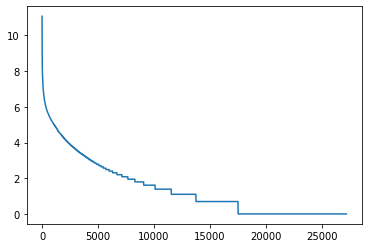

In [67]:
dmh.plot_term_frequencies_sorted(seq=abstract_term_frequencies, is_log=True)

In [47]:
tfidf_vect = TfidfVectorizer()
abstract_task_tfidf = tfidf_vect.fit_transform(abstract_task['processed_sen'])
abstract_task_tfidf.shape

(46867, 19127)

In [37]:
df_first_sen = abstract_task[abstract_task['Rank'] == 0]
len(df_first_sen)

7000

## Task distribution over first sentence

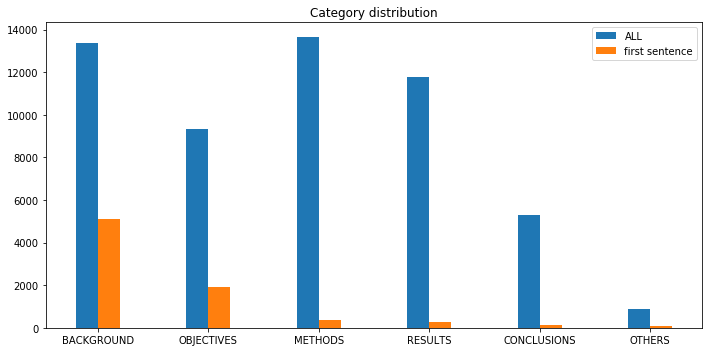

In [127]:
bar_width = 0.2
index = np.arange(len(tasks))

fig = plt.figure(figsize=(10, 5))
ax = fig.subplots()

rects1 = ax.bar(index - bar_width/2, abstract_task[tasks].sum(), bar_width, label='ALL')
rects2 = ax.bar(index + bar_width/2, df_first_sen[tasks].sum(), bar_width, label='first sentence')

ax.set_title('Category distribution')
ax.set_xticks(index)
ax.set_xticklabels(tasks)
ax.legend()

fig.tight_layout()
plt.show()
# plt.savefig('first_sentence.png')

In [52]:
df_last_sen = abstract_task[abstract_task['Is_last'] == 1]
len(df_last_sen)

7000

## Task distribution over last sentence

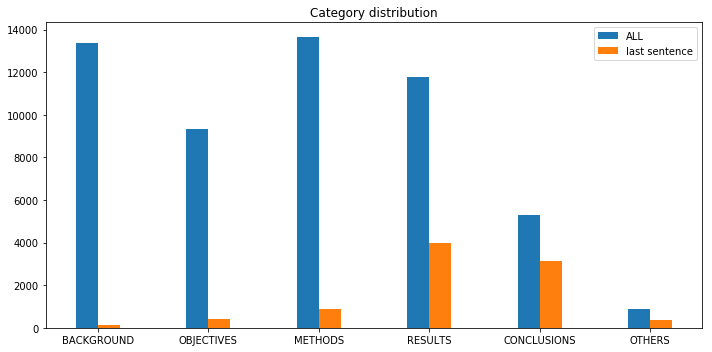

In [128]:
bar_width = 0.2
index = np.arange(len(tasks))

fig = plt.figure(figsize=(10, 5))
ax = fig.subplots()

rects1 = ax.bar(index - bar_width/2, abstract_task[tasks].sum(), bar_width, label='ALL')
rects2 = ax.bar(index + bar_width/2, df_last_sen[tasks].sum(), bar_width, label='last sentence')

ax.set_title('Category distribution')
ax.set_xticks(index)
ax.set_xticklabels(tasks)
ax.legend()

fig.tight_layout()
plt.show()
# plt.savefig('last_sentence.png')

In [54]:
df_second_sen = abstract_task[abstract_task['Rank'] == 1]
len(df_second_sen)

6950

## Task distribution over second sentence

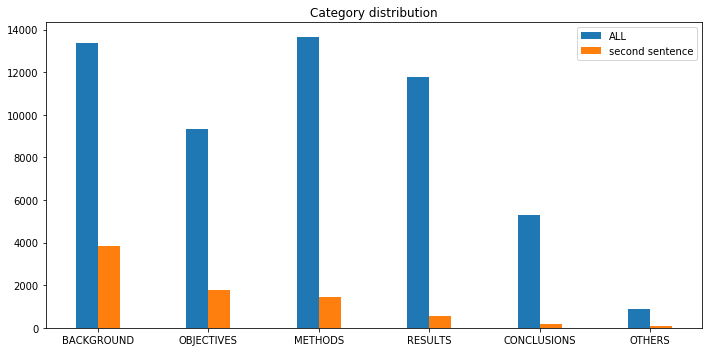

In [129]:
bar_width = 0.2
index = np.arange(len(tasks))

fig = plt.figure(figsize=(10, 5))
ax = fig.subplots()

rects1 = ax.bar(index - bar_width/2, abstract_task[tasks].sum(), bar_width, label='ALL')
rects2 = ax.bar(index + bar_width/2, df_second_sen[tasks].sum(), bar_width, label='second sentence')

ax.set_title('Category distribution')
ax.set_xticks(index)
ax.set_xticklabels(tasks)
ax.legend()

fig.tight_layout()
plt.show()
# plt.savefig('second_sentence.png')

In [59]:
df_third_sen = abstract_task[abstract_task['Rank'] == 2]
len(df_third_sen)

6809

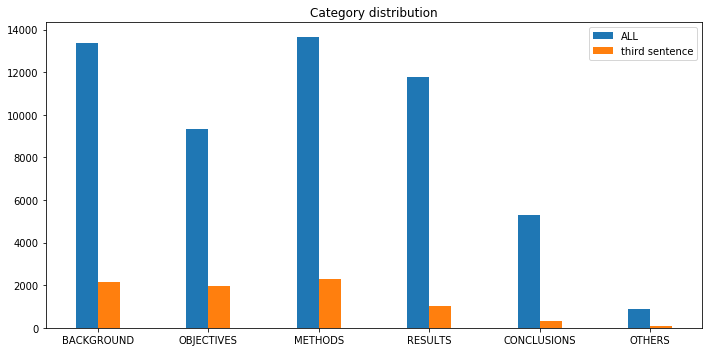

In [60]:
bar_width = 0.2
index = np.arange(len(tasks))

fig = plt.figure(figsize=(10, 5))
ax = fig.subplots()

rects1 = ax.bar(index - bar_width/2, abstract_task[tasks].sum(), bar_width, label='ALL')
rects2 = ax.bar(index + bar_width/2, df_third_sen[tasks].sum(), bar_width, label='third sentence')

ax.set_title('Category distribution')
ax.set_xticks(index)
ax.set_xticklabels(tasks)
ax.legend()

fig.tight_layout()
plt.show()

In [17]:
sentence_task_pair = []

for doc_idx, row in abstract_task.iterrows():
    if row['Is_last'] == 0:
        next_row = abstract_task.iloc[doc_idx+1]
        
        for idx1, t1 in enumerate(row[tasks]):
            if t1 == 1:
                for idx2, t2 in enumerate(next_row[tasks]):
                    if t2 == 1:
                        sentence_task_pair.append('{}+{}.'.format(tasks[idx1], tasks[idx2]))
                        
sentence_task_pair_series = pd.Series(sentence_task_pair)
len(sentence_task_pair_series)

55232

## Type of task after ...

Type of task after BACKGROUND
['BACKGROUND - 45.33 %', 'OBJECTIVES - 30.73 %', 'METHODS - 14.97 %', 'RESULTS - 5.91 %', 'CONCLUSIONS - 2.41 %', 'OTHERS - 0.66 %']
Type of task after OBJECTIVES
['METHODS - 43.27 %', 'OBJECTIVES - 22.25 %', 'RESULTS - 17.11 %', 'BACKGROUND - 10.19 %', 'CONCLUSIONS - 6.23 %', 'OTHERS - 0.95 %']
Type of task after METHODS
['METHODS - 43.36 %', 'RESULTS - 34.93 %', 'CONCLUSIONS - 12.14 %', 'OBJECTIVES - 5.55 %', 'BACKGROUND - 2.86 %', 'OTHERS - 1.16 %']
Type of task after RESULTS
['RESULTS - 50.05 %', 'CONCLUSIONS - 26.76 %', 'METHODS - 13.74 %', 'OBJECTIVES - 4.02 %', 'OTHERS - 2.90 %', 'BACKGROUND - 2.53 %']
Type of task after CONCLUSIONS
['CONCLUSIONS - 36.30 %', 'RESULTS - 33.10 %', 'METHODS - 15.45 %', 'OTHERS - 5.80 %', 'OBJECTIVES - 5.24 %', 'BACKGROUND - 4.12 %']
Type of task after OTHERS
['OTHERS - 22.68 %', 'RESULTS - 21.99 %', 'METHODS - 20.79 %', 'CONCLUSIONS - 12.20 %', 'OBJECTIVES - 11.68 %', 'BACKGROUND - 10.65 %']


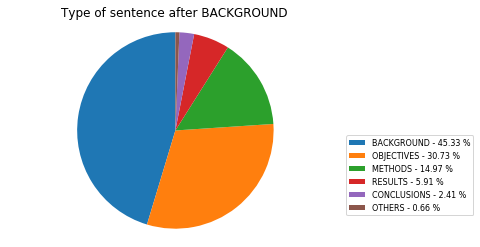

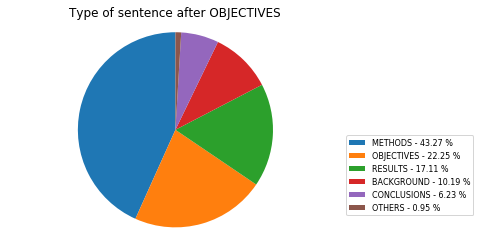

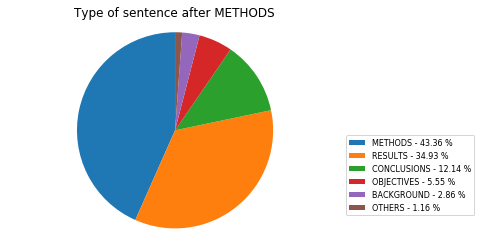

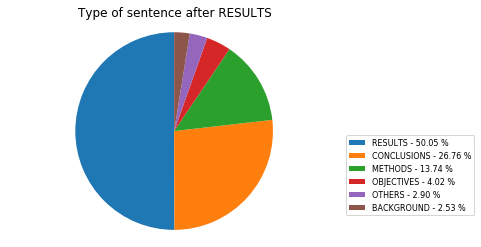

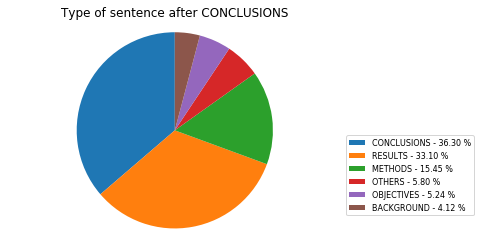

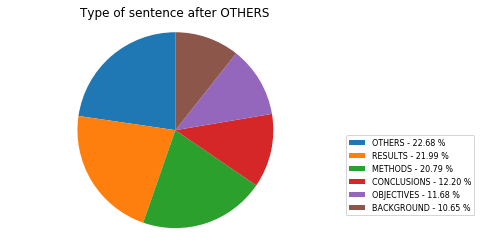

In [19]:
for task in tasks:
    print('Type of task after ' + task)
    
    temp = sentence_task_pair_series[sentence_task_pair_series.apply(lambda s : task+'+' in s)].value_counts()
    # Pie chart, where the slices will be ordered and plotted counter-clockwise:
    labels = tasks
    
    y = np.array([])
    for l in labels:
        y = np.append(y, [temp['{}+{}.'.format(task, l)]])
        
    percent =  100 * y / sum(y)
#     labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(labels, percent)]
    labels = ['{0} - {1:1.2f} %'.format(labels[i],j) for i,j in zip(np.argsort(percent), np.sort(percent))][::-1]

    print(labels)
    
    fig1, ax1 = plt.subplots()
    patches, texts = ax1.pie(np.sort(y)[::-1], startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax1.set_title('Type of sentence after ' + task)

    plt.legend(patches, labels, loc="best", bbox_to_anchor=(1, 0.5), fontsize=8)
    
#     plt.show()
#     plt.savefig('img/type_after_task/{}.png'.format(task), bbox_inches="tight")

In [108]:
# sentence_task_pair_series.to_csv('data_set/sentence_task_pair_series.csv')

---

In [49]:
count_vect = CountVectorizer(ngram_range=(2,2), lowercase=True)
data_count = count_vect.fit_transform(abstract_task['processed_sen'])
data_count.shape

(46867, 311084)

In [ ]:
abstract_bigrams_freq = dmh.get_term_frequencies(data_count)

In [12]:
count_vect_no = CountVectorizer(max_features=10000, ngram_range=(2,2), lowercase=True)
data_count_no = count_vect_no.fit_transform(abstract_task['processed_sen_no_stop'])
data_count_no.shape

(46867, 10000)

In [9]:
abstract_bigrams_freq_no = dmh.get_term_frequencies(data_count_no)

array([   1,    1,    1, ...,  967,  971, 1013], dtype=int64)

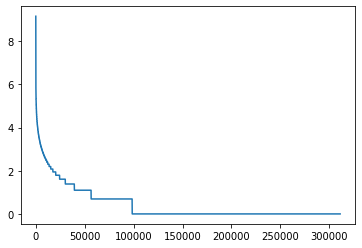

In [5]:
dmh.plot_term_frequencies_sorted(seq=abstract_bigrams_freq, is_log=True)

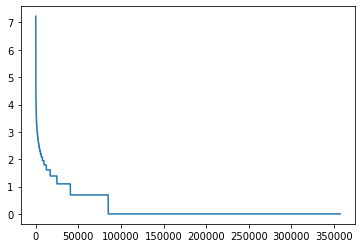

In [10]:
dmh.plot_term_frequencies_sorted(seq=abstract_bigrams_freq_no, is_log=True)

In [ ]:
start = time.time()

N = 20
index = np.arange(N)

for task, color in zip(tasks, colors):
    term_freq = dmh.get_term_frequencies(data_count[(abstract_task[task] == 1).values])
    top_N_term = []
    
    for i in np.argsort(term_freq)[::-1][:N]:
        top_N_term.append(count_vect.get_feature_names()[i])
    y = np.sort(term_freq)[::-1][:N]

    fig = plt.figure(figsize=(10, 5))
    ax = fig.subplots()

    ax.set_title('Top {} term in {}'.format(N, task))
    ax.barh(index, y, align='center', color=color)
    ax.set_yticks(index)
    ax.set_yticklabels(top_N_term)
    ax.invert_yaxis()

    fig.tight_layout()
#     plt.show()
    plt.savefig('img/top_{}_term_in_task/{}.png'.format(N, task), bbox_inches="tight")
    
print(f'time : {time.time() - start} sec')

time : 4.014018774032593 sec


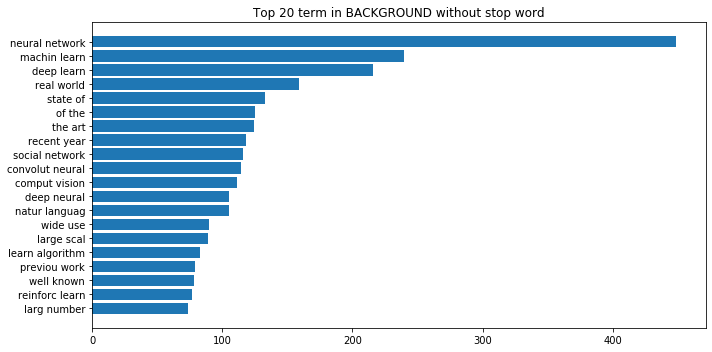

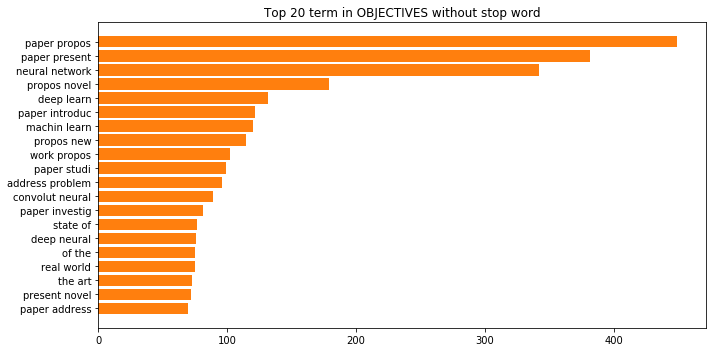

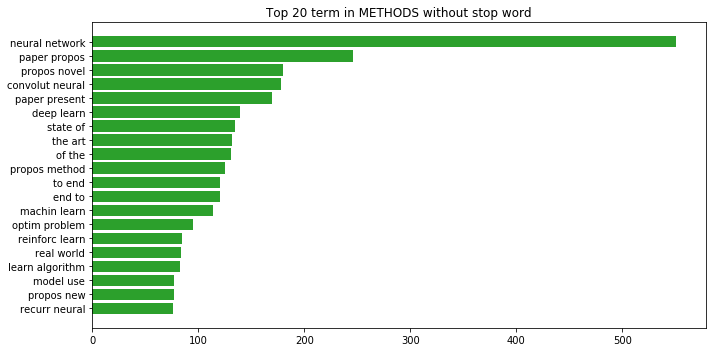

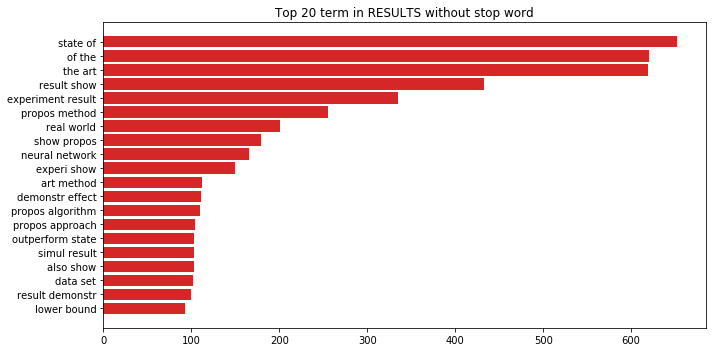

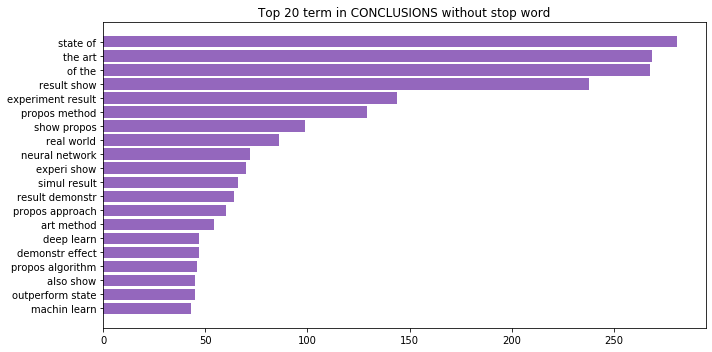

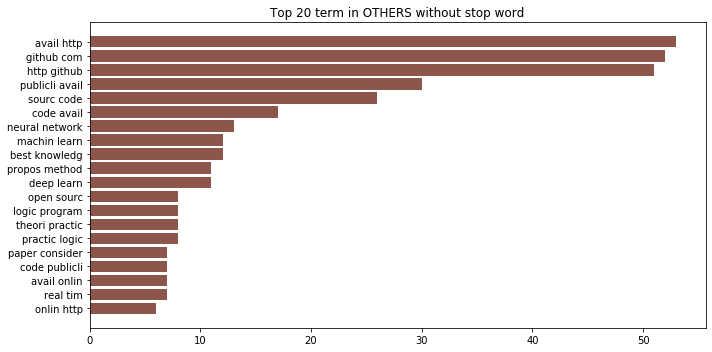

In [14]:
start = time.time()

N = 20
index = np.arange(N)

for task, color in zip(tasks, colors):
    term_freq = dmh.get_term_frequencies(data_count_no[(abstract_task[task] == 1).values])
    top_N_term = []
    
    for i in np.argsort(term_freq)[::-1][:N]:
        top_N_term.append(count_vect_no.get_feature_names()[i])
    y = np.sort(term_freq)[::-1][:N]

    fig = plt.figure(figsize=(10, 5))
    ax = fig.subplots()

    ax.set_title('Top {} term in {} without stop word'.format(N, task))
    ax.barh(index, y, align='center', color=color)
    ax.set_yticks(index)
    ax.set_yticklabels(top_N_term)
    ax.invert_yaxis()

    fig.tight_layout()
#     plt.show()
    plt.savefig('img/top_{}_term_in_task_without_stop_word/{}.png'.format(N, task), bbox_inches="tight")
    
print(f'time : {time.time() - start} sec')

In [6]:
start = time.time()

# term_freq = []
# arr = data_count[(abstract_task['BACKGROUND'] == 1).values]
    
# for t in arr.T:
#     term_freq.append(t.toarray().sum())

# abstract_bigrams_freq = dmh.get_term_frequencies(data_count)

print(f'time : {time.time() - start} sec')

time : 18.658109188079834 sec
